In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder

In [2]:
df = pd.read_csv('CARS.csv')
df = df.dropna()

In [4]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [5]:
df['Invoice'] = df['Invoice'].str.replace(r'(,|\$)', '', regex=True)
df['Invoice'] = df['Invoice'].apply(int)

df['MSRP'] = df['MSRP'].str.replace(r'(,|\$)', '', regex=True)
df['MSRP'] = df['MSRP'].apply(int)

In [6]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         426 non-null    object 
 1   Model        426 non-null    object 
 2   Type         426 non-null    object 
 3   Origin       426 non-null    object 
 4   DriveTrain   426 non-null    object 
 5   MSRP         426 non-null    int64  
 6   Invoice      426 non-null    int64  
 7   EngineSize   426 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   426 non-null    int64  
 10  MPG_City     426 non-null    int64  
 11  MPG_Highway  426 non-null    int64  
 12  Weight       426 non-null    int64  
 13  Wheelbase    426 non-null    int64  
 14  Length       426 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 53.2+ KB


In [8]:
df_columns = df.columns.tolist()
columns_to_encode = df_columns[:5]

In [9]:
df_to_encode = df[columns_to_encode]
encoder = OrdinalEncoder()
df_to_encode = pd.DataFrame(encoder.fit_transform(df_to_encode), columns=df_to_encode.columns)
df_to_encode

,Make,Model,Type,Origin,DriveTrain
0,0.0,229.0,1.0,0.0,0.0
1,0.0,293.0,2.0,0.0,1.0
2,0.0,364.0,2.0,0.0,1.0
3,0.0,363.0,2.0,0.0,1.0
4,0.0,0.0,2.0,0.0,1.0
...,...,...,...,...,...
421,37.0,83.0,2.0,1.0,1.0
422,37.0,82.0,2.0,1.0,1.0
423,37.0,320.0,2.0,1.0,1.0
424,37.0,387.0,5.0,1.0,1.0


In [10]:
df[columns_to_encode] = df_to_encode
df.dropna(inplace=True)

In [11]:
df

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,0.0,229.0,1.0,0.0,0.0,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,0.0,293.0,2.0,0.0,1.0,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,0.0,364.0,2.0,0.0,1.0,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,0.0,363.0,2.0,0.0,1.0,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,0.0,0.0,2.0,0.0,1.0,43755,39014,3.5,6.0,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,37.0,83.0,2.0,1.0,1.0,37730,35542,2.9,6.0,208,20,28,3576,110,190
422,37.0,82.0,2.0,1.0,1.0,37885,35688,2.5,5.0,194,20,27,3691,110,190
423,37.0,320.0,2.0,1.0,1.0,40565,38203,2.4,5.0,197,21,28,3450,105,186
424,37.0,387.0,5.0,1.0,1.0,42565,40083,2.3,5.0,242,20,26,3450,105,186


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 0 to 425
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         424 non-null    float64
 1   Model        424 non-null    float64
 2   Type         424 non-null    float64
 3   Origin       424 non-null    float64
 4   DriveTrain   424 non-null    float64
 5   MSRP         424 non-null    int64  
 6   Invoice      424 non-null    int64  
 7   EngineSize   424 non-null    float64
 8   Cylinders    424 non-null    float64
 9   Horsepower   424 non-null    int64  
 10  MPG_City     424 non-null    int64  
 11  MPG_Highway  424 non-null    int64  
 12  Weight       424 non-null    int64  
 13  Wheelbase    424 non-null    int64  
 14  Length       424 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 53.0 KB


In [13]:
std_scaler_tr = StandardScaler()
std_scaler_ts = StandardScaler()

mm_scaler_tr = MinMaxScaler()
mm_scaler_ts = MinMaxScaler()

X, y = df.drop(columns=['MSRP'], axis=1), df['MSRP']

X = np.array(X)
y = np.array(y).reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [14]:
x_train = mm_scaler_tr.fit_transform(x_train)
x_test = mm_scaler_ts.fit_transform(x_test)

x_train = std_scaler_tr.fit_transform(x_train)
x_test = std_scaler_ts.fit_transform(x_test)

y_train = mm_scaler_tr.fit_transform(y_train)
y_test = mm_scaler_ts.fit_transform(y_test)

y_train = std_scaler_tr.fit_transform(y_train)
y_test = std_scaler_ts.fit_transform(y_test)

In [15]:
y_train.shape

(339, 1)

In [16]:
x_train.shape

(339, 14)

In [17]:
model = Sequential()
model.add(Dense(64, 'relu', input_shape=[x_train.shape[1]]))
model.add(Dense(1, 'linear'))

In [23]:
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                960       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [24]:
EPOCHS = 50
history = model.fit(x_train,
                    y_train,
                    shuffle=True,
                    epochs=EPOCHS,
                    validation_split=0.2,
                    verbose='auto')

Epoch 1/50
9/9 [==============================] - 1s 21ms/step - loss: 0.0182 - mse: 0.0182 - mae: 0.0978 - val_loss: 0.0309 - val_mse: 0.0309 - val_mae: 0.1386
Epoch 2/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0146 - mse: 0.0146 - mae: 0.0879 - val_loss: 0.0258 - val_mse: 0.0258 - val_mae: 0.1264
Epoch 3/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0127 - mse: 0.0127 - mae: 0.0835 - val_loss: 0.0279 - val_mse: 0.0279 - val_mae: 0.1311
Epoch 4/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0108 - mse: 0.0108 - mae: 0.0784 - val_loss: 0.0253 - val_mse: 0.0253 - val_mae: 0.1259
Epoch 5/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0097 - mse: 0.0097 - mae: 0.0755 - val_loss: 0.0249 - val_mse: 0.0249 - val_mae: 0.1264
Epoch 6/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0088 - mse: 0.0088 - mae: 0.0718 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1209
Epoch 7/50
9/9 [=======================

In [25]:
loss, mse, mae = model.evaluate(x_train, y_train, verbose=False)
print("Training Loss: {:.4f}\t\tTraining MSE: {:.4f}\t\tTraining MAE: {:.4f}".format(loss, mse, mae))
loss, mse, mae = model.evaluate(x_test, y_test, verbose=False)
print("Test Accuracy: {:.4f}\t\tTest MSE: {:.4f}\t\tTest MAE: {:.4f}".format(loss, mse, mae))

Training Loss: 0.0034		Training MSE: 0.0034		Training MAE: 0.0350
Test Accuracy: 0.0133		Test MSE: 0.0133		Test MAE: 0.0818


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


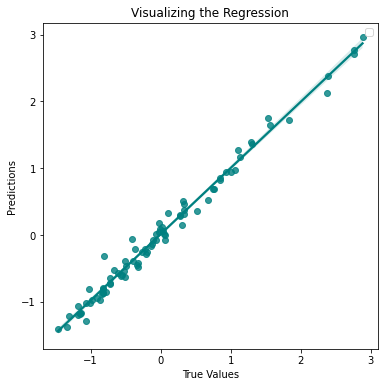

In [26]:
test_predictions = model.predict(x_test).flatten()

plt.figure(figsize= (6, 6))
plt.title('Visualizing the Regression')
sns.regplot(x=y_test, y=test_predictions, color = 'teal')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import r2_score
print('The R2 square value of NN is :', r2_score(y_test, test_predictions)*100)

The R2 square value of NN is : 98.6660043447027
